/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


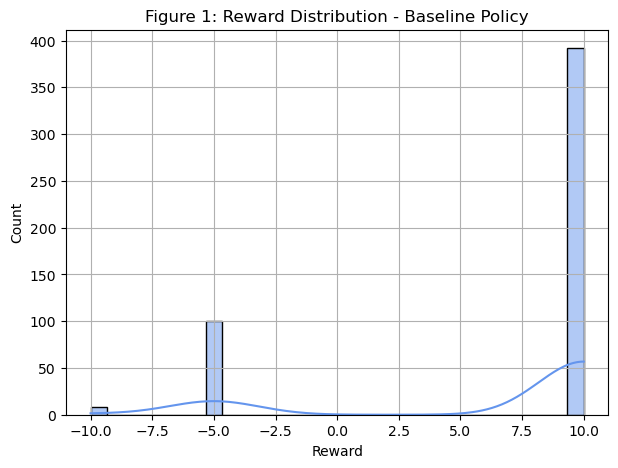

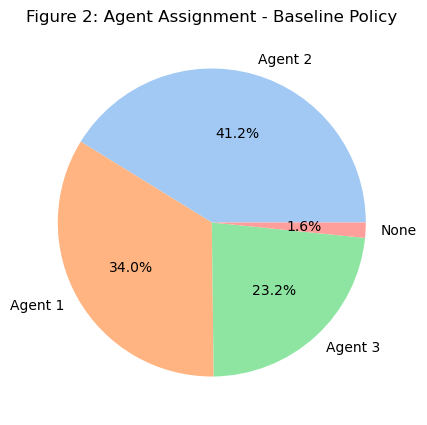

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


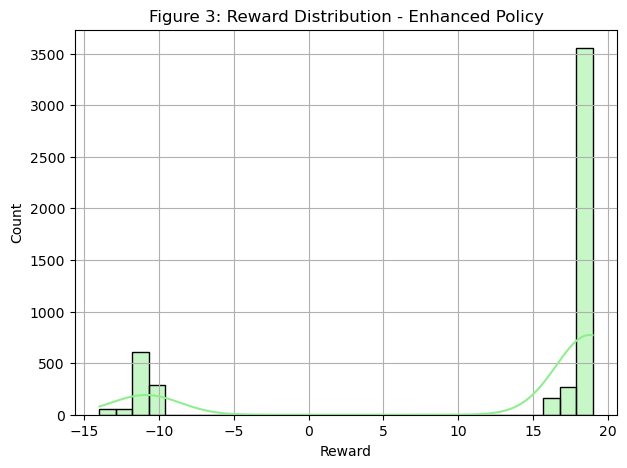

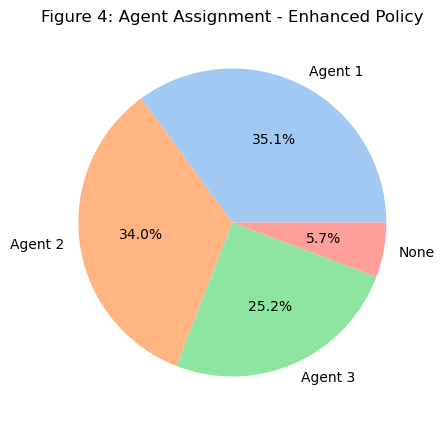

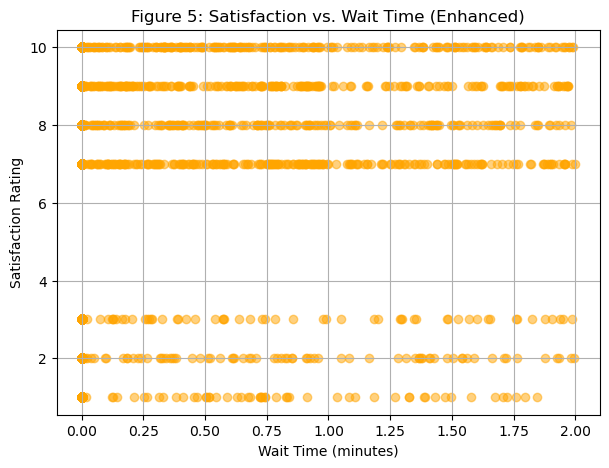

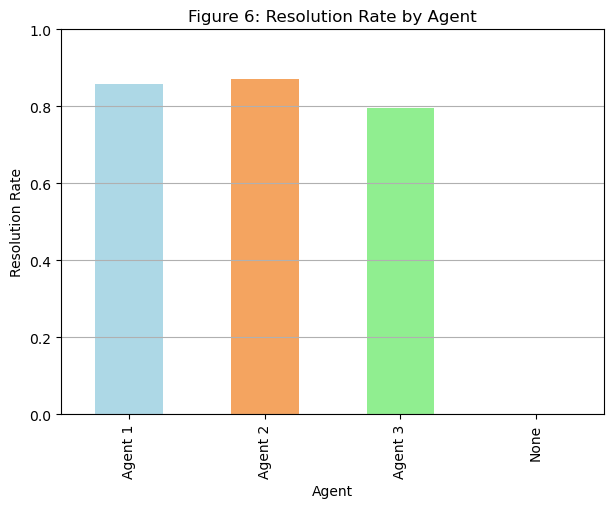

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
baseline_df = pd.read_csv("mdp_baseline_policy.csv")
enhanced_df = pd.read_csv("mdp_enhanced_waittime_policy.csv")

# Clean and align structure
baseline_df["Resolved"] = baseline_df["Resolved"].astype(bool)
enhanced_df["Resolved"] = enhanced_df["Resolved"].astype(bool)

action_to_agent = {0: "Agent 1", 1: "Agent 2", 2: "Agent 3", 3: "None"}
baseline_df["Agent"] = baseline_df["Action"].map(action_to_agent)
enhanced_df["Agent"] = enhanced_df["Action"].map(action_to_agent)

#FIGURE 1: Reward Distribution – Baseline Policy
plt.figure(figsize=(7, 5))
sns.histplot(baseline_df["Reward"], bins=30, kde=True, color='cornflowerblue')
plt.title("Figure 1: Reward Distribution - Baseline Policy")
plt.xlabel("Reward")
plt.ylabel("Count")
plt.grid(True)
plt.savefig("figure_1_baseline_reward.png", dpi=300, bbox_inches='tight')
plt.show()

# FIGURE 2: Agent Assignment – Baseline Policy
plt.figure(figsize=(7, 5))
baseline_df["Agent"].value_counts().plot(kind="pie", autopct="%.1f%%", colors=sns.color_palette("pastel"))
plt.title("Figure 2: Agent Assignment - Baseline Policy")
plt.ylabel("")
plt.savefig("figure_2_baseline_agent.png", dpi=300, bbox_inches='tight')
plt.show()

#FIGURE 3: Reward Distribution – Enhanced Policy
plt.figure(figsize=(7, 5))
sns.histplot(enhanced_df["Reward"], bins=30, kde=True, color='lightgreen')
plt.title("Figure 3: Reward Distribution - Enhanced Policy")
plt.xlabel("Reward")
plt.ylabel("Count")
plt.grid(True)
plt.savefig("figure_3_enhanced_reward.png", dpi=300, bbox_inches='tight')
plt.show()

#FIGURE 4: Agent Assignment – Enhanced Policy
plt.figure(figsize=(7, 5))
enhanced_df["Agent"].value_counts().plot(kind="pie", autopct="%.1f%%", colors=sns.color_palette("pastel"))
plt.title("Figure 4: Agent Assignment - Enhanced Policy")
plt.ylabel("")
plt.savefig("figure_4_enhanced_agent.png", dpi=300, bbox_inches='tight')
plt.show()

#FIGURE 5: Satisfaction vs. Wait Time
plt.figure(figsize=(7, 5))
plt.scatter(enhanced_df["Wait Time (min)"], enhanced_df["Satisfaction"], alpha=0.5, color='orange')
plt.title("Figure 5: Satisfaction vs. Wait Time (Enhanced)")
plt.xlabel("Wait Time (minutes)")
plt.ylabel("Satisfaction Rating")
plt.grid(True)
plt.savefig("figure_5_satisfaction_wait.png", dpi=300, bbox_inches='tight')
plt.show()

#FIGURE 6: Resolution Rate by Agent
resolution_by_agent = enhanced_df.groupby("Agent")["Resolved"].mean()

plt.figure(figsize=(7, 5))
resolution_by_agent.plot(kind="bar", color=['lightblue', 'sandybrown', 'lightgreen'])
plt.title("Figure 6: Resolution Rate by Agent")
plt.ylabel("Resolution Rate")
plt.xlabel("Agent")
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.savefig("figure_6_resolution_agent.png", dpi=300, bbox_inches='tight')
plt.show()

